In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving vacinas.xlsx to vacinas (2).xlsx


In [ ]:
class Data:
  def __init__(self , file, country):
      self._file = file
      self._country = country
      
  def getTotalData(self):    
    self._dataFile = pd.read_excel(f'{self._file}')
    self._data = self._dataFile.loc[(self._dataFile['Município'] != '-')]
    return self._data

  def getStateData(self , state):
      self._dataState = self.getTotalData().loc[(self.getTotalData()['UF'] == f'{state}')] 
      return self._dataState

  def getRegionData(self , region):
      self._dataRegion = self.getTotalData().loc[(self.getTotalData()['Região'] == f'{region}')] 
      return self._dataRegion

  @property
  def country(self):
      return self._country

  @country.setter
  def country(self , country):
    self._country = country

  @property
  def file(self):
    return self._file

  @file.setter
  def file(self, file):
    self._file = file

In [ ]:
dataBrasil = Data('vacinas.xlsx' , 'Brasil')

In [ ]:
dataBrasil.getTotalData()

,Município,Cód. IBGE,UF,Região,Fabricante,Doses Aplicadas,Dose 1,Dose 2
0,Abadia De Goiás,520005,GO,Centro-Oeste,FIOCRUZ/ASTRAZENECA,3560,2633,927
1,Abadia De Goiás,520005,GO,Centro-Oeste,BUTANTAN/SINOVAC,3125,1682,1443
2,Abadia De Goiás,520005,GO,Centro-Oeste,PFIZER/BIONTECH,1297,1297,0
3,Abadia De Goiás,520005,GO,Centro-Oeste,JANSSEN,65,0,0
4,Abadia Dos Dourados,310010,MG,Sudeste,FIOCRUZ/ASTRAZENECA,3624,2711,913
...,...,...,...,...,...,...,...,...
21878,Zé Doca,211400,MA,Nordeste,JANSSEN,362,0,0
21879,Zortéa,421985,SC,Sul,FIOCRUZ/ASTRAZENECA,1483,928,555
21880,Zortéa,421985,SC,Sul,BUTANTAN/SINOVAC,1200,706,494
21881,Zortéa,421985,SC,Sul,PFIZER/BIONTECH,855,854,1


In [ ]:
dataBrasil.getStateData('DF')

,Município,Cód. IBGE,UF,Região,Fabricante,Doses Aplicadas,Dose 1,Dose 2
2950,Brasília,530010,DF,Centro-Oeste,FIOCRUZ/ASTRAZENECA,1052153,715180,336973
2951,Brasília,530010,DF,Centro-Oeste,BUTANTAN/SINOVAC,773096,434824,338272
2952,Brasília,530010,DF,Centro-Oeste,PFIZER/BIONTECH,755523,727149,28374
2953,Brasília,530010,DF,Centro-Oeste,JANSSEN,44430,0,0


In [ ]:
dataBrasil.getRegionData('Centro-Oeste')

,Município,Cód. IBGE,UF,Região,Fabricante,Doses Aplicadas,Dose 1,Dose 2
0,Abadia De Goiás,520005,GO,Centro-Oeste,FIOCRUZ/ASTRAZENECA,3560,2633,927
1,Abadia De Goiás,520005,GO,Centro-Oeste,BUTANTAN/SINOVAC,3125,1682,1443
2,Abadia De Goiás,520005,GO,Centro-Oeste,PFIZER/BIONTECH,1297,1297,0
3,Abadia De Goiás,520005,GO,Centro-Oeste,JANSSEN,65,0,0
8,Abadiânia,520010,GO,Centro-Oeste,FIOCRUZ/ASTRAZENECA,8154,6189,1965
...,...,...,...,...,...,...,...,...
21658,Vila Propício,522230,GO,Centro-Oeste,JANSSEN,82,0,0
21659,Vila Rica,510860,MT,Centro-Oeste,FIOCRUZ/ASTRAZENECA,4724,3730,994
21660,Vila Rica,510860,MT,Centro-Oeste,BUTANTAN/SINOVAC,3655,1923,1732
21661,Vila Rica,510860,MT,Centro-Oeste,PFIZER/BIONTECH,2685,2677,8


In [ ]:
class Stats:
  def __init__(self , dataFrame):
    self._dataFrame = dataFrame
    self._totalData = dataFrame.getTotalData()

  def getFirstDose(self):
      firstDose = self._totalData['Dose 1']
      return( f'O total de primeiras doses aplicadas no {self._dataFrame.country} foi {sum(firstDose)}')

  def getSecondDose(self):
      secondDose = self._totalData['Dose 2']
      return  (f'O total de segundas doses aplicadas no {self._dataFrame.country} foi {sum(secondDose)}')


  def getStateFirstDose(self, state):
      stateFirstDose = self._dataFrame.getStateData(f'{state}')['Dose 1']
      return f'O total de primeiras doses aplicadas no {state} foi {sum(stateFirstDose)}'
      
  def getStateSecondDose(self, state):
      stateSecondDose = self._dataFrame.getStateData(f'{state}')['Dose 2']
      print(f'O total de segundas doses aplicadas no {state} foi {sum(stateSecondDose)}')
      return sum(stateSecondDose)

  def mostVacCity(self , state):
      sumVacCity = self._dataFrame.getStateData(f'{state}')[['Município' , 'Dose 2']].groupby('Município' , as_index=False).sum()
      mostVaccinated = sumVacCity.loc[sumVacCity['Dose 2'] == sumVacCity['Dose 2'].max()]
      return mostVaccinated
  
  def leastVacCity(self , state):
      sumVacCity = self._dataFrame.getStateData(f'{state}')[['Município'  , 'Dose 2']].groupby('Município' , as_index=False ).sum()
      leastVaccinated = sumVacCity.loc[sumVacCity['Dose 2'] == sumVacCity['Dose 2'].min()]
      return leastVaccinated

  def getPopularVac(self , state):
      sumVaccines = self._dataFrame.getStateData(f'{state}')[['Fabricante' , 'Doses Aplicadas']].groupby('Fabricante' , as_index=False).sum()
      popularVaccine = sumVaccines.loc[sumVaccines['Doses Aplicadas'] == sumVaccines['Doses Aplicadas'].max()]
      return popularVaccine


  def meanStates(self):
      meanStates = self._totalData.groupby(['UF' , 'Município'] , as_index=False).agg({'Dose 2': 'sum'}).groupby(['UF'] , as_index=False).mean()
      return meanStates

  def getVacCapitals(self):
      capitals = ['Porto Velho' , 'Manaus' , 'Rio Branco' , 'Campo Grande' , 'Macapá' ,'Brasília' , 
      'Boa Vista' , 'Cuiabá' , 'Palmas' , 'São Paulo' , 'Teresina' , 'Rio de Janeiro' , 'Belém' , 
      'Goiânia' , 'Salvador' , 'Florianópolis' , 'São Luís' , 'Maceió' , 'Porto Alegre' ,
     'Curitiba' , 'Belo Horizonte' , 'Fortaleza' , 'Recife' , 'João Pessoa' , 'Aracaju' , 'Natal' , 'Vítoria']

      data = self._totalData.loc[self._totalData['Município'].isin(capitals)]
      vacCapitals = data.groupby('Município', as_index=False).sum()
      return vacCapitals[['Município' , 'Dose 1' , 'Dose 2']]

  def getVacRegion(self):
      sumVacRegion = self._totalData[['Região' , 'Doses Aplicadas']].groupby('Região' , as_index=False).sum()
      return sumVacRegion

  def getVacTown(self , region):
      sumVacTown = self._dataFrame.getRegionData(f'{region}')[['Município' , 'Doses Aplicadas']].groupby('Município' , as_index=False).sum()
      mostVaccinated = sumVacTown.loc[sumVacTown['Doses Aplicadas'] == sumVacTown['Doses Aplicadas'].max()]
      return mostVaccinated
        


In [ ]:
statsBrasil = Stats(dataBrasil)

In [ ]:
statsBrasil.getFirstDose()

'O total de primeiras doses aplicadas no Brasil foi 124791669'

In [ ]:
statsBrasil.getSecondDose()

'O total de segundas doses aplicadas no Brasil foi 53456720'

In [ ]:
statsBrasil.getStateFirstDose('BA')

'O total de primeiras doses aplicadas no BA foi 7524665'

In [ ]:
statsBrasil.getStateSecondDose('DF')

O total de segundas doses aplicadas no DF foi 703619


703619

In [ ]:
statsBrasil.mostVacCity('BA')

,Município,Dose 2
333,Salvador,764388


In [ ]:
statsBrasil.leastVacCity('BA')

,Município,Dose 2
176,Itaeté,107


In [ ]:
statsBrasil.getPopularVac('BA')

,Fabricante,Doses Aplicadas
1,FIOCRUZ/ASTRAZENECA,4979409


In [ ]:
statsBrasil.meanStates()

,UF,Dose 2
0,AC,8807.227273
1,AL,7478.823529
2,AM,12112.145161
3,AP,7688.250000
4,BA,7230.103118
5,CE,8312.603261
6,DF,703619.000000
7,ES,15208.500000
8,GO,6602.739837
9,MA,6372.986175


In [ ]:
statsBrasil.getVacCapitals()

,Município,Dose 1,Dose 2
0,Aracaju,424739,161945
1,Belo Horizonte,1771165,884648
2,Belém,908446,378282
3,Boa Vista,205079,54790
4,Brasília,1877153,703619
5,Campo Grande,662068,369122
6,Cuiabá,359134,157458
7,Curitiba,1282445,588190
8,Florianópolis,387911,187575
9,Fortaleza,1957245,751850


In [ ]:
statsBrasil.getVacRegion()

,Região,Doses Aplicadas
0,Centro-Oeste,14310155
1,Nordeste,41069429
2,Norte,12215097
3,Sudeste,85729863
4,Sul,29198955


In [ ]:
statsBrasil.getVacTown('Sul')

,Município,Doses Aplicadas
285,Curitiba,1907532


In [ ]:
class Graph(Stats):
  
  def __init__(self , dataframe , stats):
        super().__init__(dataframe) 
        self._stats = stats
                
  def getStates(self):
        states = self._stats.meanStates()['UF']
        mean = self._stats.meanStates()['Dose 2']
        
        plt.figure(figsize=(30 , 7))
        plt.bar(states , mean , color='#25FA00' , width=0.25)

       
        plt.xlabel('Estados')
        plt.ylabel('Média')
        plt.title('Média de 2º doses por estado')

        plt.show()    

  def getCapitals(self):
        capitals = self._stats.getVacCapitals()['Município']
        dose1 = self._stats.getVacCapitals()['Dose 1']
        dose2 = self._stats.getVacCapitals()['Dose 2']

        #largura das barrs
        barWidth = 0.25

        #tamaho do grafico
        plt.figure(figsize=(30 , 7))


        #posicao das barras
        x1 = np.arange(len(dose1))
        x2 = [x + barWidth for x in x1]


        # criando as barras
        plt.bar(x1 , dose1 , color='#0DFFF3' , width=barWidth , label='Dose 1')
        plt.bar(x2 , dose2 , color='#FA3600' , width=barWidth , label='Dose 2')


        # legendas
        plt.xlabel('Capitais')
        plt.xticks([x + barWidth for x in range(len(dose1))], capitals)
        plt.ylabel('Doses')
        plt.title('Total de 1º e 2º doses nas capitais')

        plt.legend()
        plt.show()


  def getRegion(self):
        totaldoses = self._stats.getVacRegion()['Doses Aplicadas']
        regions = self._stats.getVacRegion()['Região']

        explode = (0.1, 0.1, 0.1, 0.1 , 0.1) 


        colors = ['#FA9F00' ,'#FF0700' , '#26FF00' ,'#FF00F6' , '#01F5CC']

        plt.figure(figsize=(10 , 10))

        plt.pie(totaldoses , labels=regions , shadow=True , explode=explode , colors=colors ,autopct='%1.1f%%')
        plt.show()


In [ ]:
graphBrasil = Graph(dataBrasil , StatsBrasil)

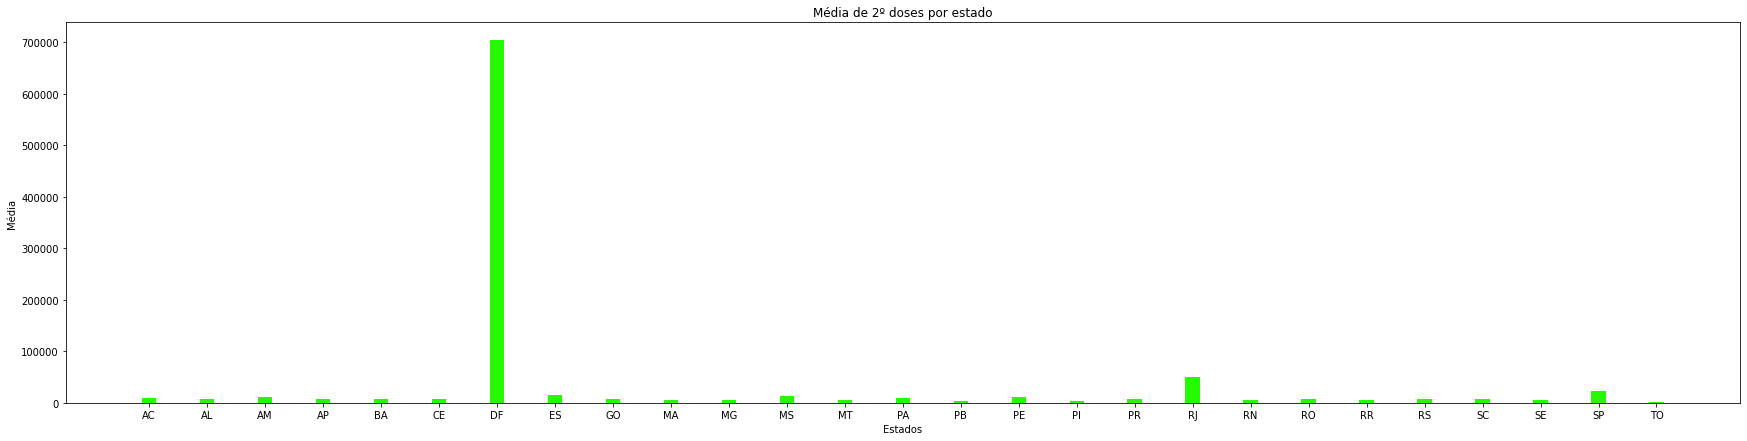

In [ ]:
graphBrasil.getStates()

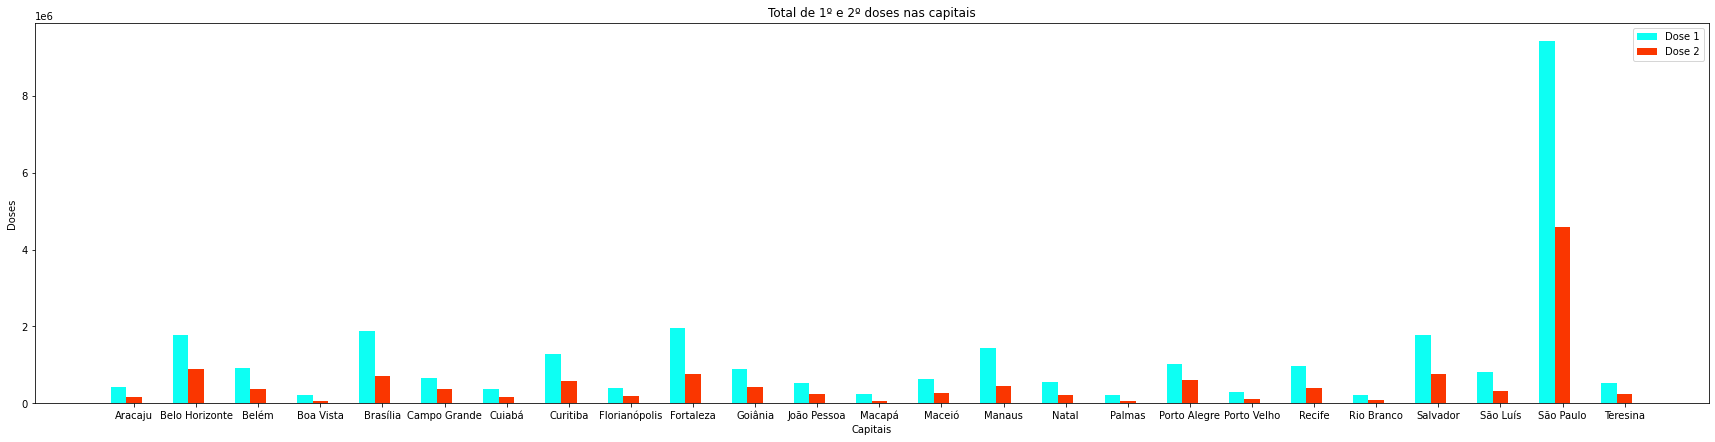

In [ ]:
graphBrasil.getCapitals()

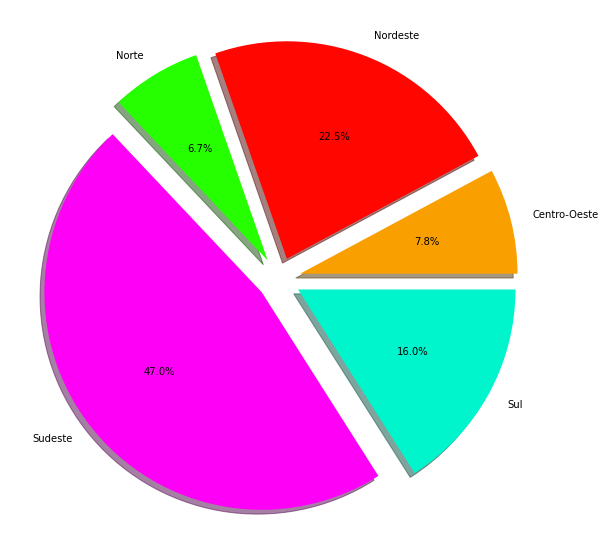

In [ ]:
graphBrasil.getRegion()